# Media Company Case Study 
---
A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then, it started witnessing a decline in viewership. The company wants to figure out what went wrong.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

import warnings 
warnings.filterwarnings('ignore')
plt.style.use('dark_background')
%matplotlib inline

### Loading Data

In [2]:
# reading the data
media = pd.read_csv("mediacompany.csv")
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [3]:
# checking the number of rows
media.index

RangeIndex(start=0, stop=80, step=1)

In [4]:
# checking info
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 80 non-null     object 
 1   Views_show           80 non-null     int64  
 2   Visitors             80 non-null     int64  
 3   Views_platform       80 non-null     int64  
 4   Ad_impression        80 non-null     int64  
 5   Cricket_match_india  80 non-null     int64  
 6   Character_A          80 non-null     int64  
 7   Unnamed: 7           0 non-null      float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


### Data Cleaning and Manipulation

In [5]:
# dropping Unnamed: 7, probably added wrongly while reading data
media.drop('Unnamed: 7', axis=1, inplace=True)

In [6]:
# Date column is an object, let's convert it to datetime
media.Date = pd.to_datetime(media.Date)

In [7]:
# we don't have any nulls in our dataset
# let's check for numerical cols stats using describe
media.describe()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,2017-04-09 12:00:00,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
min,2017-03-01 00:00:00,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,2017-03-20 18:00:00,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,2017-04-09 12:00:00,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,2017-04-29 06:00:00,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,2017-05-19 00:00:00,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000
std,NaN,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177


In [8]:
# creating a new column days to keep track of number of days since start of the show 
d0 = pd.Timestamp('2017-02-28 00:00:00', tz=None)
d1 = media.Date
delta = d1-d0
media['day'] = delta

In [9]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [10]:
# cleaning day column
media['day'] = media.day.astype(str)
media['day'] = media.day.apply(lambda x: x.replace('days', ''))
media['day'] = media.day.astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


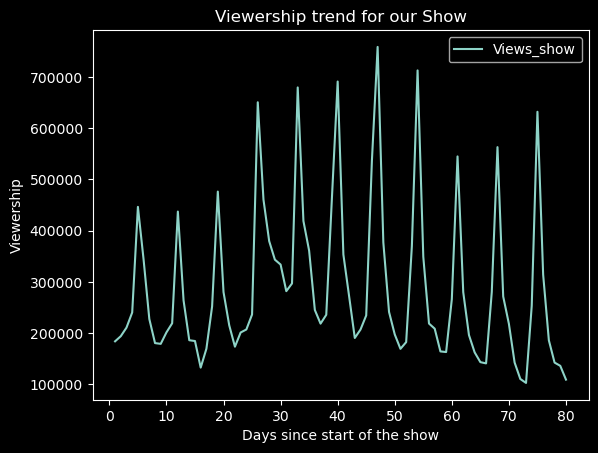

In [11]:
# there is a huge gap of 6 lakhs in max and min views of show
# let's analyse by plotting a line chart
media.plot.line(x='day', y='Views_show')
plt.title("Viewership trend for our Show")
plt.ylabel('Viewership') 
plt.xlabel('Days since start of the show')
plt.show() 

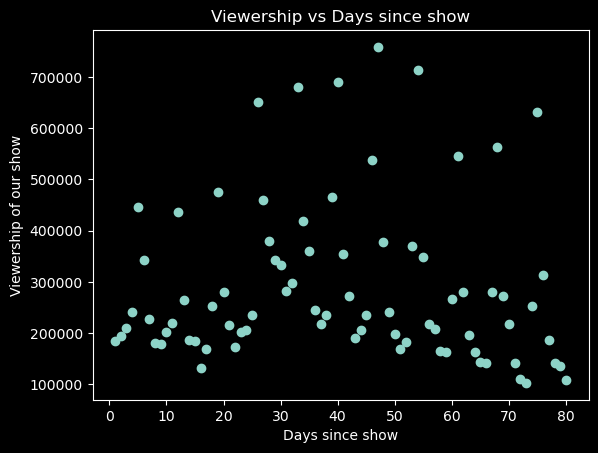

In [12]:
# scatter plot days vs views_show
plt.scatter(media.day, media.Views_show)
plt.title('Viewership vs Days since show')
plt.xlabel('Days since show')
plt.ylabel('Viewership of our show')
plt.show() 

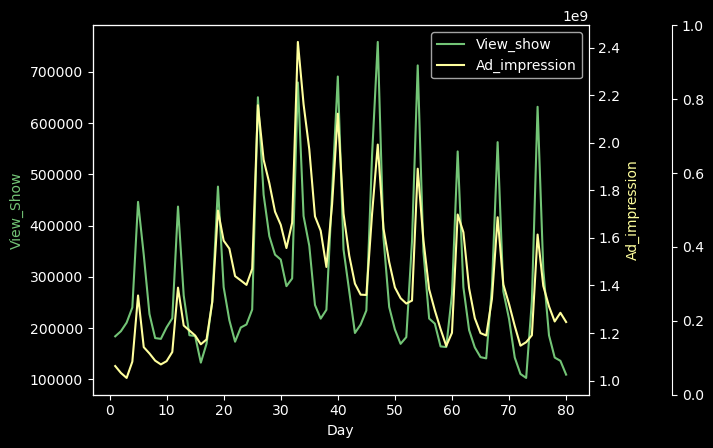

In [13]:
# let's analyse by plotting a line chart
fig  = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel('Day')
host.set_ylabel('View_Show')
par1.set_ylabel('Ad_impression')

color1 = plt.cm.Greens(0.5)
color2 = plt.cm.hot(0.9)

p1, = host.plot(media.day, media.Views_show, color = color1, label = 'View_show')
p2, = par1.plot(media.day, media.Ad_impression, color = color2, label = 'Ad_impression')

lns = [p1,p2]
host.legend(handles=lns, loc='best')

par2.spines['right'].set_position(('outward', 60))

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig('multiple_y-axis.png', bbox_inches = 'tight')

- Both viewership count of show and number of viewers based on ad impression have a weak pattern indicating a downfall in viewership of the show.

In [14]:
# derived metrics
# weekdays are taken such that 1 corresponds to monday and 7 to sunday
# Since 1st March, 2017 was a wednesday, we will calculate accordingly
media['weekday'] = (media['day']+2)%7 
media.weekday.replace(0,7, inplace=True) 
media.weekday = media.weekday.astype(int) 
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,3
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,4
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,5
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,6
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,7


### Data Visualisation

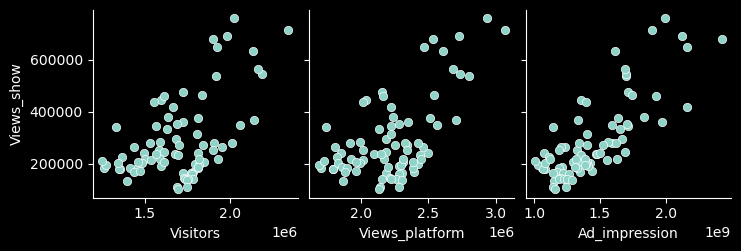

In [15]:
# let's check the relationship of our Views_show column with other columns
num_col = ['Visitors', 'Views_platform', 'Ad_impression']
sns.pairplot(x_vars=num_col, y_vars = 'Views_show', data=media)
plt.show()

- There is a linear realtionship visible between 'Views_show' and visitors, views_platform, and ad_impression
- Although the pattern looks same, let's make sure if multicolleniarity exists.
- If it exists, we will only take one feature

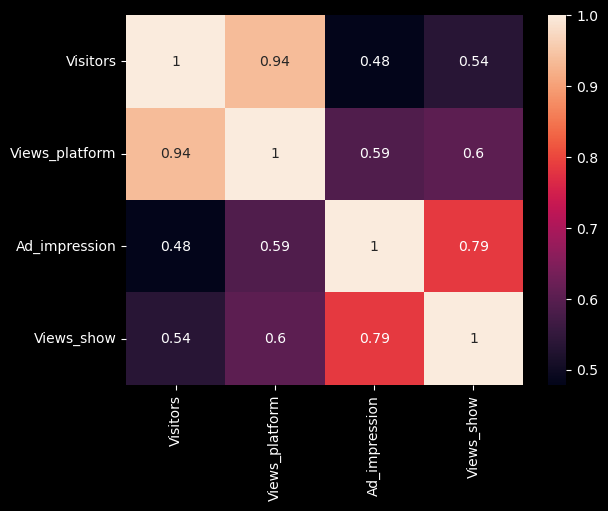

In [16]:
# to check the correlation between these variables, let's plot a heatmap
num_col.append('Views_show')
sns.heatmap(media[num_col].corr(), annot=True)
plt.show()

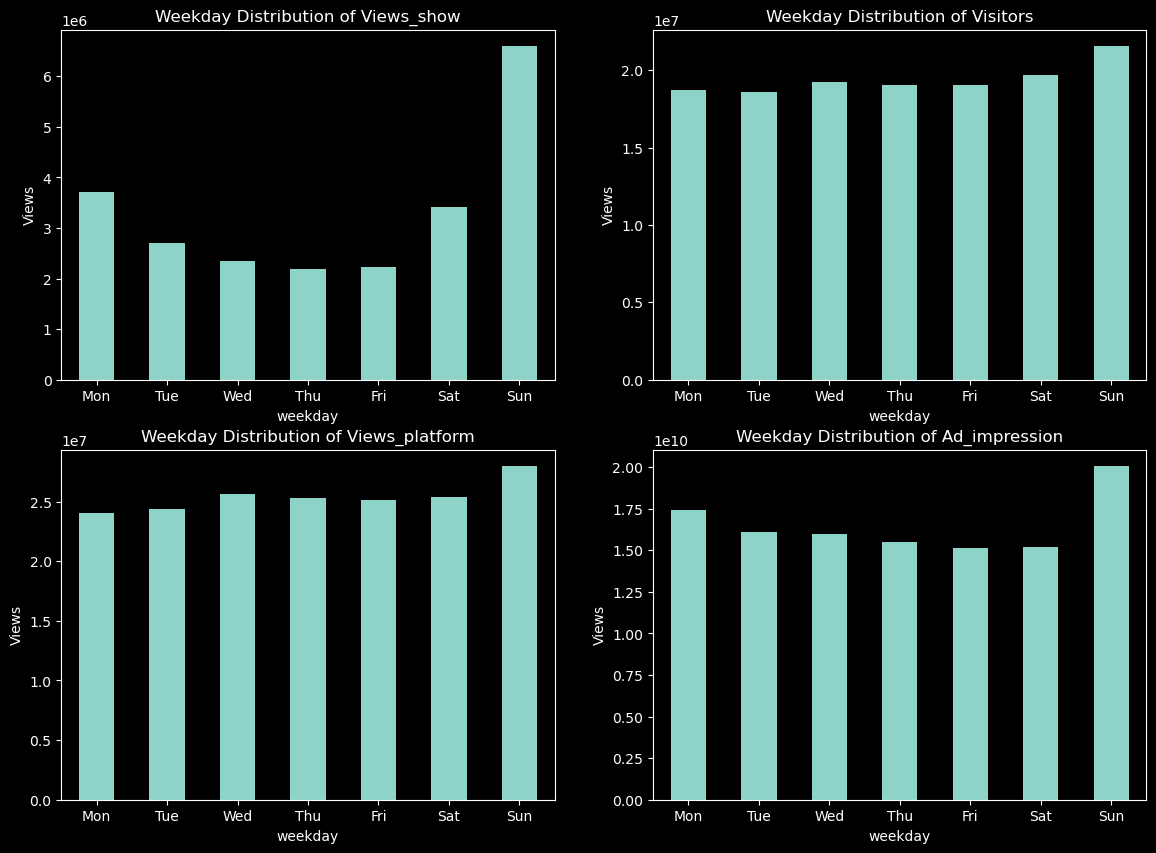

In [17]:
# plotting bar charts for each day in a week, to get an understanding of view count on those days
cols = ['Views_show', 'Visitors', 'Views_platform', 'Ad_impression']
plt.figure(figsize=(14,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1) 
    media.groupby('weekday')[cols[i]].sum().plot.bar() 
    plt.title('Weekday Distribution of {}'.format(cols[i])) 
    plt.ylabel('Views')
    plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

- Its clear from above charts, most views are coming on Sundays, since its a holiday and people tend to watch shows, hence our company's platform is seeing most people coming on sundays to watch some or other shows. 

# Linear Regression Model Building

- **Not splitting into Train, test split, since we need to figure out why viewership dropped and not predict for future**

#### 1st Linear Model
- Feature Variables:
    - Visitors
    - Weekday

In [18]:
# making first model lm1 using features weekday and ad_impression
# feature variables to X
X = media[['Visitors', 'weekday']]

# response variable to y
y = media['Views_show'] 

In [19]:
# first we need to add a constant since we are using stats model which unlike sklearn does not fit constant automatically
X = sm.add_constant(X)
lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary()) 

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     21.44
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           3.98e-08
Time:                        21:06:05   Log-Likelihood:                -1051.4
No. Observations:                  80   AIC:                             2109.
Df Residuals:                      77   BIC:                             2116.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.145e+05   1.05e+05     -2.996      0.0

- We got a very low R-squared from first model of 35.8%
- Let's move on to build more models by adding/removing features. 
---

- Let's convert all 7 days to binary representation where `1` means its a weekend (Saturday/Sunday) and `0` means its a weekday.

In [20]:
# creating another variable weekend with 0 as weekday and 1 as weekend
def weekend(x):
    if x % 7 == 6 or x % 7 == 0:
        x = 1
    else:
        x = 0
    return x
media['weekend'] = media['weekday'].apply(weekend)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,3,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,4,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,5,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,6,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,7,1


#### 2nd Linear Model
- Feature Variable:
    - Weekend (0,1) 
    - Visitors
    - Character_A (0,1) (0 means `A` was present and 1 means was absent from that day's episode)

In [21]:
# defining features
X = media[['weekend', 'Visitors', 'Character_A']]

# defining response
y = media.Views_show

In [22]:
# training model lm2
X = sm.add_constant(X)
lm_2 = sm.OLS(y, X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.53e-14
Time:                        21:06:05   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

- We can see our R-squared increased significantly by adding weekend, character_a's presence and removing weekday feature.
- Also, coefficient of character A variable is very high indicating that his absence does drop the viewership and vice versa. It's able to understand the variance of target variable quite well. 
- Let's move on to refine our model
---

- Creating a lag variable that will store the previous day's view count of our show

In [23]:
# let's create lag variable
media['Lag_Views'] = np.roll(media['Views_show'], 1)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,3,0,108961
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,4,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,5,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,6,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,7,1,240061


In [24]:
media.Lag_Views.replace(108961, 0, inplace=True)

#### 3rd Linear Model:
- Features are:
    - Visitors
    - Character_A
    - Weekend
    - Lag_Views

In [25]:
# lm3 
# feature variables
X = media[['Visitors', 'Character_A', 'weekend', 'Lag_Views']]
y = media.Views_show

In [26]:
X = sm.add_constant(X)
lm_3 = sm.OLS(y, X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           3.16e-21
Time:                        21:06:05   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

- We see another significant increase in R-squared value making our model even better. 
- Coeff value of Character_A has falled though and also p-value is very high for our visitors variable making visitors variable insignificant
---

In [27]:
# checking correlation between lag_views and views_show
media[['Lag_Views', 'Views_show']].corr()

,Lag_Views,Views_show
Lag_Views,1.00000,0.41758
Views_show,0.41758,1.00000


#### 4th Linear Model
- Features are:
    - Character_A
    - Weekend
    - Views_platorm
---
Dropping visitors since it is insignificant and also dropping lag_views from our model to see since it is harder to explain its significance

In [28]:
# lm_4
# features
X = media[['Character_A', 'weekend', 'Views_platform']]

#response
y = media.Views_show

In [29]:
X = sm.add_constant(X)
lm_4 = sm.OLS(y, X).fit()
print(lm_4.summary()) 

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           3.59e-15
Time:                        21:06:05   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

- We see a huge drop in R-squared value.
- Till now, our 2nd model was best, let's recreate that.
---

#### 5th Linear Model 
- Features are:
    - Visitors 
    - Character_A
    - Weekend
    - Ad_impression
- First 3 are from second model and we have introduced Ad_impression to our model to see if it improves. 

In [30]:
# lm2 was best so let's introduce ad_impression in that model
X = media[['Visitors', 'Character_A', 'weekend', 'Ad_impression']]

#response
y = media.Views_show

In [31]:
X = sm.add_constant(X)
lm_5 = sm.OLS(y, X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.10e-25
Time:                        21:06:06   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

- Voila! We can see a huge jump from R-squared of 58% in 2nd model and 80% now after introducing Ad_impression to our model.
- There is one thing that alarms us though, a very high p-value of variable visitors making it completely insignificant.
- Also, we cannont ignore that p-value has increased for character A as well. Hence, reduce its significance as well. 
---

In [32]:
# checking correlation of visitors and views_platform
media[['Visitors', 'Views_platform']].corr()

,Visitors,Views_platform
Visitors,1.000000,0.935832
Views_platform,0.935832,1.000000


- Views_platform (overall viewership of platform) and Visitor (no of visitors on platform) are highly correlated, making it a case of multicollinearity, hence we cannot use both of these variables together in our Linear Model.

#### 6th Linear Model
- Features are:
    - Character_A
    - Weekend 
    - Ad_impression
- We first remove visitors variable (insignificant due to high p-value) from our model to check if it improves. We never drop two variables at a time. 

In [33]:
# running sixth model
# dropping visitors due to its insignificance
X = media[['Character_A', 'weekend', 'Ad_impression']]
y = media.Views_show

In [34]:
X = sm.add_constant(X)
lm_6 = sm.OLS(y, X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.05e-26
Time:                        21:06:06   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

- Our R-squared didn't drop, confirming the fact that indeed visitors was not needed and was causing multicollinearity. 
- Although, We don't see a drop in p-value of Character_A variable, which makes it less significant still.
---

In [35]:
# checking correlation between 6th model's feature variables
media[['Character_A', 'Ad_impression', 'Views_show']].corr()

,Character_A,Ad_impression,Views_show
Character_A,1.000000,0.644354,0.402533
Ad_impression,0.644354,1.000000,0.785673
Views_show,0.402533,0.785673,1.000000


- The values of ad_impression are in millions and that of views_show are in lakhs. let's scale down ad_impression to views_show level

In [36]:
# let's bring ad_impression to the same unit level as of our views_show
media.Ad_impression = media.Ad_impression.apply(lambda x: x/1000000) 

#### 7th Linear Model 
- Features are:
    - Character_A
    - Ad_impression
    - Weekend
- Let's rebuild the 6th model, after rescaling ad_impression

In [37]:
X = media[['Character_A', 'Ad_impression', 'weekend']]
y = media.Views_show

In [38]:
X = sm.add_constant(X)
lm_7 = sm.OLS(y, X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.05e-26
Time:                        21:06:06   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

- Same insight as 6th model.
---

#### 8th Linear Model 
- Features are:
    - Character_A         
    - Ad_impression        
    - weekend             
    - Cricket_match_india
- Let's introduce Cricket_match_india in our model as well.

In [39]:
# let's also introduce cricket_match_india
X = media[['Character_A', 'Ad_impression', 'weekend', 'Cricket_match_india']]
y = media.Views_show

In [40]:
X = sm.add_constant(X)
lm_8 = sm.OLS(y, X).fit() 
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.02e-25
Time:                        21:06:06   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.633e+05    

- let's drop character_A for the same reason that its p-value is high making it insignificant. 
- Also, let's drop cricket_match_india, as it has negative coefficient and it is insignificant as well, hence we can say our viewership is not getting affected due to india's match.
---

#### 9th Linear Model
- Features are:
    - Ad_impression 
    - Weekend

In [41]:
X = media[['Ad_impression', 'weekend']]
y = media.Views_show

In [42]:
X = sm.add_constant(X)
lm_9 = sm.OLS(y, X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.95e-27
Time:                        21:06:06   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.302e+05   4.01e+04     -5.744

- This looks like the best model so far, where we have a very decent R-squared of 79.8% and also all feature variables are significant.
- Let's use this model to come to give insights. 
---

- We didn't calculate VIF yet. Let's just have a look of VIF for all the variables.

# VIF

In [43]:
vif_vars = ['Visitors', 'Views_platform', 'Ad_impression','Cricket_match_india', 
            'Character_A', 'day', 'weekday', 'weekend', 'Lag_Views'] 

In [44]:
X = media[vif_vars]
df = pd.DataFrame()
df['Features'] = X.columns
df['VIF'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df

,Features,VIF
0,Visitors,1064.037465
1,Views_platform,1007.772352
2,Ad_impression,83.523921
3,Cricket_match_india,1.485790
4,Character_A,4.121253
5,day,11.993182
6,weekday,28.472562
7,weekend,4.113169
8,Lag_Views,16.058039


#### Making Predictions Using our best model so far (which is 9th Linear Model).

In [45]:
# prediction
X = media[['Ad_impression', 'weekend']]
y = media.Views_show
X = sm.add_constant(X)
lm_9 = sm.OLS(y, X).fit()
y_pred = lm_9.predict(X) 

In [46]:
mse = mean_squared_error(media.Views_show, y_pred)
r_squared = r2_score(y_true=y, y_pred=y_pred)

In [47]:
print('Mean_Squared_Error: ', mse)
print('R-squared: ', r_squared)

Mean_Squared_Error:  4797239258.824437
R-squared:  0.7975978797926214


- We have good accuracy, actual r-squared is 79.8% and model predicts 79.7%.

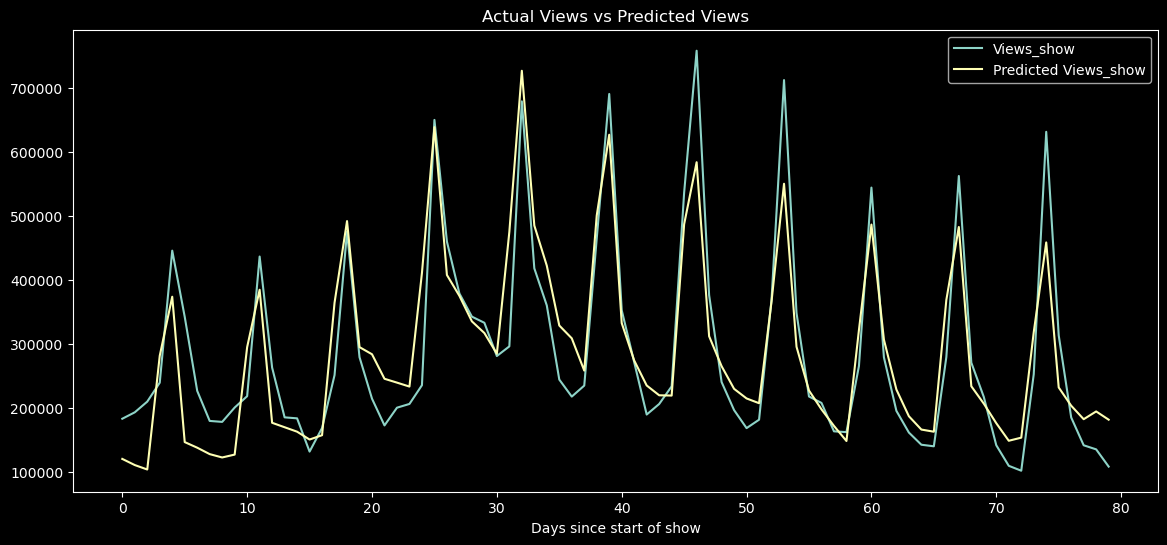

In [48]:
# plotting the line plot to show the actual vs predicted 
plt.figure(figsize=(14,6))
legend = ['Views_show', 'Predicted Views_show']
plt.plot(y)
plt.plot(y_pred)
plt.title('Actual Views vs Predicted Views')
plt.xlabel('Days since start of show')
plt.legend(legend)
plt.show()

- The predicted line almost covers all the actual part.  

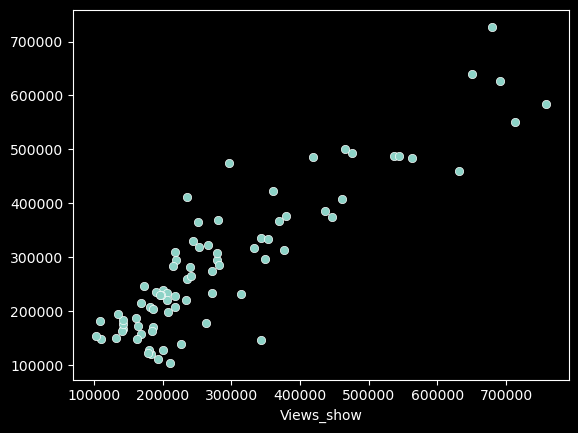

In [49]:
# plotting the actual vs predicted scatterplot
sns.scatterplot(x=y,y=y_pred)
plt.show()

# Residual analysis

In [50]:
# calculating residuals (errors)
res = y_pred - y

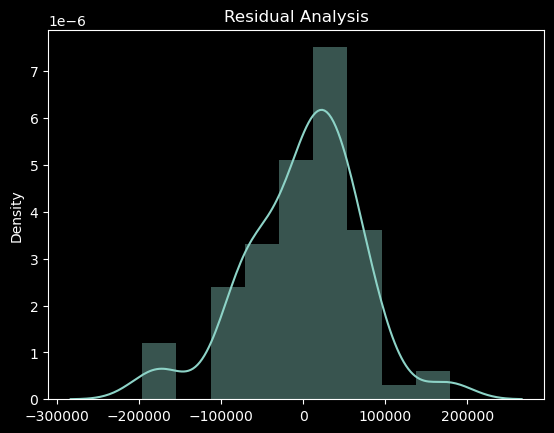

In [51]:
# plotting distplot of residuals to see if they follow normal distribution
sns.distplot(res)
plt.title('Residual Analysis')
plt.show()

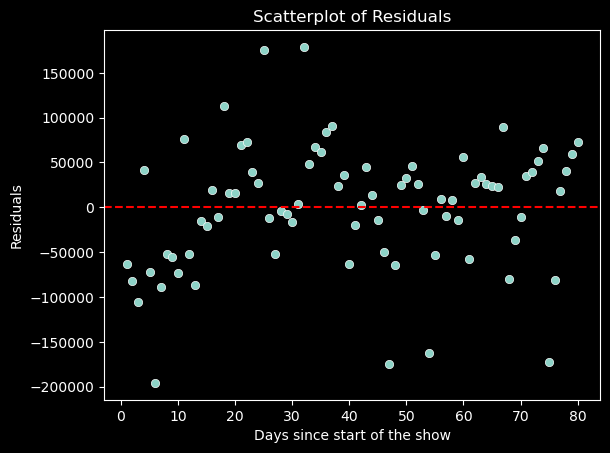

In [52]:
plt.axhline(y=0, color = 'red', linestyle='--')
sns.scatterplot(x=media.day, y =res)
plt.xlabel('Days since start of the show')
plt.ylabel('Residuals') 
plt.title('Scatterplot of Residuals')
plt.show()

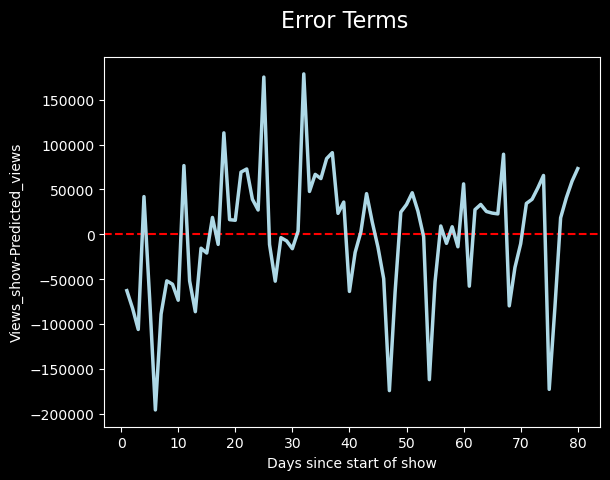

In [53]:
# Error terms
fig = plt.figure()
plt.axhline(y=0, color= 'red', linestyle='--')
plt.plot(media.day,res, color="lightblue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Days since start of show', fontsize=10)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=10)   # Y-label
plt.show() 

- We can clearly see from above line plot, scatter plot and distplot, that error terms are randoml distributed. 
- What this essentially confirms is that there are no variables that could have helped explain the model better. 
    - A non-random error pattern, on the other hand, would mean that the errors are capturing some patterns, thus indicating that the model could have been better. A non-random error pattern indicates that there are certain systematic unexplained aspects in the outcomes that are being captured in the error. This pattern in the errors could probably have been explained by some explanatory variable, which is missing in the model. So, the idea is that a model should explain everything that is possible such that only the random errors are left.

# Conclusion
---
**Ad Impressions and Character A** can be the driver variables that could be used to increase the viewership of the show. Ad impressions are directly proportional to the marketing budget. Thus, by increasing the marketing budget, better viewership could be achieved. Similarly, Character A’s absence and presence create a significant change in show viewership. Character A’s presence brings viewers to the show. Thus, these two variables can be acted upon to improve the show viewership.
- Character A’s dates might not be available. Thus, the marketing team can focus on ad impressions instead.